# Student Dropout Analysis

## Data Understanding

### Preparing necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import pymysql
from sqlalchemy import create_engine
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
df_ori = pd.read_csv(
    "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/students_performance/data.csv",
    encoding='utf-8-sig', # handling the BOM
    sep=';'
)
df_ori.tail(5)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,10,1,9773,1,1,152.0,22,38,37,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


In [3]:
# Ignore the value of 'enrolled' in Status
df = df_ori[df_ori['Status'].isin(['Dropout', 'Graduate'])].copy()
df['Status'].describe()

count         3630
unique           2
top       Graduate
freq          2209
Name: Status, dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                3630 non-null   int64  
 1   Application_mode                              3630 non-null   int64  
 2   Application_order                             3630 non-null   int64  
 3   Course                                        3630 non-null   int64  
 4   Daytime_evening_attendance                    3630 non-null   int64  
 5   Previous_qualification                        3630 non-null   int64  
 6   Previous_qualification_grade                  3630 non-null   float64
 7   Nacionality                                   3630 non-null   int64  
 8   Mothers_qualification                         3630 non-null   int64  
 9   Fathers_qualification                         3630 non-null   int64 

In [8]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,...,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,18.421763,1.750138,8853.980992,0.887603,4.532231,132.920606,1.828099,19.986226,22.571625,...,0.128926,0.581818,6.296419,7.763085,4.518457,10.036155,0.142149,11.630358,1.231598,-0.009256
std,0.613009,17.358595,1.333831,2068.760082,0.315897,10.024134,13.238373,6.667614,15.585278,15.275453,...,0.679111,2.022688,2.263020,3.964163,3.162376,5.481742,0.747670,2.667652,1.384911,2.259986
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.517857,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.333333,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.500000,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,6.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


### Simplifying categories (mapping)

#### Marital Status

In [9]:
def marital_status(status):
    if status == 1:
        return "Never Married (yet)"
    elif status in [3, 4, 6]:  # Widower, Divorced, Legally Separated
        return "Previously Married"
    elif status == 2:  # Married
        return 'Currently Married/In Union'
    elif status == 5:  # Factounion
        return 'Currently Married/In Union'
    else:
        return 'Unknown'

df['Marital_status'] = (df['Marital_status']).astype(int)
df['Marital_status'] = df['Marital_status'].apply(marital_status)
df['Marital_status'].describe()


count                    3630
unique                      3
top       Never Married (yet)
freq                     3199
Name: Marital_status, dtype: object

#### Mother and Father's Qualifications

In [10]:
mother_qual_mapping = {
    # No Formal/Low Education
    34: "No Formal/Low Education", 35: "No Formal/Low Education", 36: "No Formal/Low Education",
    37: "No Formal/Low Education", 38: "No Formal/Low Education",

    # Basic Education
    11: "Basic Education", 14: "Basic Education", 18: "Basic Education",
    19: "Basic Education", 22: "Basic Education", 26: "Basic Education",
    27: "Basic Education", 29: "Basic Education", 30: "Basic Education",

    # Secondary Education
    1: "Secondary Education", 9: "Secondary Education", 10: "Secondary Education", 12: "Secondary Education",

    # Higher Education
    2: "Higher Education", 3: "Higher Education", 4: "Higher Education", 5: "Higher Education",
    6: "Higher Education", 39: "Higher Education", 40: "Higher Education", 41: "Higher Education",
    42: "Higher Education", 43: "Higher Education", 44: "Higher Education"
}

father_qual_mapping = mother_qual_mapping.copy()
father_qual_mapping.update({
    13: "Basic Education", 20: "Basic Education", 25: "Basic Education",
    31: "Other/Unknown", 33: "Other/Unknown"
})

df['MotherQualification'] = df['Mothers_qualification'].replace(mother_qual_mapping)
df['FatherQualification'] = df['Fathers_qualification'].replace(father_qual_mapping)

df[['MotherQualification', 'FatherQualification']].describe()

,MotherQualification,FatherQualification
count,3630,3630
unique,4,5
top,No Formal/Low Education,No Formal/Low Education
freq,1444,1704


#### Mother and Father's Occupations

In [11]:
mother_occ_mapping = {
    # Managers/Professionals
    1: "Managers/Professionals", 2: "Managers/Professionals", 122: "Managers/Professionals",
    123: "Managers/Professionals", 125: "Managers/Professionals",

    # Technicians/Clerical
    3: "Technicians/Clerical", 131: "Technicians/Clerical", 132: "Technicians/Clerical",
    134: "Technicians/Clerical", 141: "Technicians/Clerical", 143: "Technicians/Clerical", 144: "Technicians/Clerical",

    # Service/Sales Workers
    4: "Service/Sales Workers", 5: "Service/Sales Workers", 151: "Service/Sales Workers",
    152: "Service/Sales Workers", 153: "Service/Sales Workers",

    # Agriculture/Skilled Manual
    6: "Agriculture/Skilled Manual", 7: "Agriculture/Skilled Manual", 171: "Agriculture/Skilled Manual",
    173: "Agriculture/Skilled Manual", 175: "Agriculture/Skilled Manual",

    # Machine Operators/Drivers
    8: "Machine Operators/Drivers",

    # Unskilled/Elementary
    9: "Unskilled/Elementary", 191: "Unskilled/Elementary", 192: "Unskilled/Elementary",
    193: "Unskilled/Elementary", 194: "Unskilled/Elementary",

    # Military
    10: "Military",

    # Other/Unknown
    0: "Student/Other/Unknown", 90: "Student/Other/Unknown", 99: "Student/Other/Unknown"
}

father_occ_mapping = mother_occ_mapping.copy()
father_occ_mapping.update({
    101: "Military", 102: "Military", 103: "Military",
    112: "Managers/Professionals", 114: "Managers/Professionals",
    121: "Managers/Professionals", 124: "Managers/Professionals",
    135: "Technicians/Clerical",
    154: "Service/Sales Workers", 195: "Service/Sales Workers",
    161: "Agriculture/Skilled Manual", 163: "Agriculture/Skilled Manual",
    172: "Agriculture/Skilled Manual", 174: "Agriculture/Skilled Manual",
    181: "Machine Operators/Drivers", 182: "Machine Operators/Drivers", 183: "Machine Operators/Drivers"
})

df['MotherOccupation'] = df['Mothers_occupation'].replace(mother_occ_mapping)
df['FatherOccupation'] = df['Fathers_occupation'].replace(father_occ_mapping)

df[['MotherOccupation', 'FatherOccupation']].describe()

,MotherOccupation,FatherOccupation
count,3630,3630
unique,8,8
top,Unskilled/Elementary,Unskilled/Elementary
freq,1338,860


#### Application Mode

In [12]:
def map_application_mode(code):
    if code in [1, 17, 18]:
        return 'General'
    elif code in [2, 5, 10, 16, 26, 27, 39]:
        return 'Special'
    elif code in [7, 42, 43, 44, 51, 53]:
        return 'Change'
    elif code in [15, 57]:
        return 'International'
    else:
        return 'Other'
    
df['Application_mode'] = df['Application_mode'].astype(int) # Convert to int
# Replace directly
df['Application_mode'] = df['Application_mode'].apply(map_application_mode)
df['Application_mode'].describe()

count        3630
unique          4
top       General
freq         2229
Name: Application_mode, dtype: object

#### Course

In [13]:
def map_course(course_code):
    if course_code in [9119, 33]:
        return 'Engineering/Technology'
    elif course_code in [171, 9070, 9773]:
        return 'Arts/Design/Communication'
    elif course_code in [8014, 9238]:
        return 'Social Sciences'
    elif course_code in [9003, 9130]:
        return 'Agriculture/Environment'
    elif course_code in [9500, 9085, 9556]:
        return 'Health Sciences'
    elif course_code in [9147, 9254, 9670, 9991]:
        return 'Business'
    elif course_code == 9853:
        return 'Education'
    else:
        return 'Other'

df['Course'] = df['Course'].apply(map_course)
df['Course'].describe()


count                3630
unique                  7
top       Health Sciences
freq                  997
Name: Course, dtype: object

#### Nationality

In [14]:
# Rename
df.rename(columns={'Nacionality': 'Nationality'}, inplace=True)

In [15]:
def map_nationality(code):
    if code == 1:
        return 'Portuguese'
    elif code in [21, 22, 24, 25, 26]:
        return 'PALOP'
    elif code == 41:
        return 'Brazilian'
    elif code in [101, 108, 109]:
        return 'Latin American'
    elif code in [2, 6, 11, 13, 14, 17, 32, 62, 100, 103, 105]:
        return 'European Countries'
    else:
        return 'Other'

df['Nationality'] = df['Nationality'].apply(map_nationality)
df['Nationality'].describe()


count           3630
unique             5
top       Portuguese
freq            3544
Name: Nationality, dtype: object

### Combining related columns (Agregration)

In [16]:
df.tail(3)

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nationality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status,MotherQualification,FatherQualification,MotherOccupation,FatherOccupation
4421,Never Married (yet),General,1,Health Sciences,1,1,154.0,Portuguese,37,37,...,13.5,0,13.9,-0.3,0.79,Dropout,No Formal/Low Education,No Formal/Low Education,Unskilled/Elementary,Unskilled/Elementary
4422,Never Married (yet),General,1,Business,1,1,180.0,Portuguese,37,37,...,12.0,0,9.4,-0.8,-3.12,Graduate,No Formal/Low Education,No Formal/Low Education,Agriculture/Skilled Manual,Service/Sales Workers
4423,Never Married (yet),Special,1,Arts/Design/Communication,1,1,152.0,PALOP,38,37,...,13.0,0,12.7,3.7,-1.70,Graduate,No Formal/Low Education,No Formal/Low Education,Service/Sales Workers,Unskilled/Elementary


In [17]:
# Save the original data
data = df.copy()

In [18]:
# 1. Academic Performance Summary:
data['Total_Credits_Attempted'] = data['Curricular_units_1st_sem_enrolled'] + data['Curricular_units_2nd_sem_enrolled']
data['Total_Credits_Approved'] = data['Curricular_units_1st_sem_approved'] + data['Curricular_units_2nd_sem_approved']
data['Approval_Rate'] = data['Total_Credits_Approved'] / data['Total_Credits_Attempted']
data['Average_Grade'] = (data['Curricular_units_1st_sem_grade'] + data['Curricular_units_2nd_sem_grade']) / 2

data['Academic_Success_Score'] = data['Approval_Rate']*data['Average_Grade']

"""
if score >= 15:
        return 'Excellent'
    elif score >= 10:
        return 'Good'
    elif score > 0:
        return 'Low'
"""

data['Academic_Success_Score'].describe()

count    3478.000000
mean        9.156885
std         5.011768
min         0.000000
25%         6.155357
50%        11.079627
75%        12.916667
max        18.283654
Name: Academic_Success_Score, dtype: float64

In [19]:
# 2. Academic Engagement Summary:
data['Total_Evaluations'] = data['Curricular_units_1st_sem_evaluations'] + data['Curricular_units_2nd_sem_evaluations']
data['Evaluations_Without_Grade'] = data['Curricular_units_1st_sem_without_evaluations'] + data['Curricular_units_2nd_sem_without_evaluations']

data['Graded_Evaluation_Ratio'] = data['Total_Evaluations'] / (data['Total_Evaluations'] + data['Evaluations_Without_Grade'])

""" 
≥ 0.9	Very High
0.75–0.9	High
0.5–0.75	Moderate
0.25–0.5	Low
< 0.25	Very Low
"""

data['Graded_Evaluation_Ratio'].describe()

count    3314.000000
mean        0.987426
std         0.050334
min         0.500000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Graded_Evaluation_Ratio, dtype: float64

In [20]:
# 3. Parental Socioeconomic Status/SES (combining mother's and father's info)

# Define which qualifications and occupations count as high SES
high_edu = ['Higher Education']
white_collar_jobs = ['Managers/Professionals', 'Technicians/Clerical']

# Boolean indicators for each parent
data['Mother_High_SES'] = data['MotherQualification'].isin(high_edu) | data['MotherOccupation'].isin(white_collar_jobs)
data['Father_High_SES'] = data['FatherQualification'].isin(high_edu) | data['FatherOccupation'].isin(white_collar_jobs)

# Combine into Parental SES Score
data['Parental_SES_Score'] = data['Mother_High_SES'].astype(int) + data['Father_High_SES'].astype(int)

""" 
Score 0: Neither parent has higher education or white-collar job
Score 1: One parent does (either high edu or white-collar)
Score 2: Both parents do (or one parent has both high edu & white-collar)
"""

data[['Parental_SES_Score']].describe()


,Parental_SES_Score
count,3630.000000
mean,0.393113
std,0.667728
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2.000000


In [21]:
# 4. Financial Situation Indicators:
data['Financial_Risk'] = (data['Debtor'] + (1 - data['Tuition_fees_up_to_date']))

""" 
0 = financially safe
1 = moderate risk
2 = high risk
"""

data['Financial_Risk'].describe()

count    3630.000000
mean        0.247658
std         0.557609
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: Financial_Risk, dtype: float64

In [22]:
# 5. Socioeconomic Risk Score
data['socioeconomic_risk_score'] = (
    data['Displaced'] +
    data['Educational_special_needs'] +
    data['International'] +
    data['Scholarship_holder']
)

""" 
0 No identified Risk
1 Low Risk
2 Moderate Risk
>3 High Risk
"""
data['socioeconomic_risk_score'].describe()

count    3630.000000
mean        0.850689
std         0.717662
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: socioeconomic_risk_score, dtype: float64

In [23]:
# 6. Macroeconomic Stress Level

# Do the Min-Max Normalization to avoid extreme values 
def min_max_normalization(x):
    return (x - x.min()) / (x.max() - x.min())

data['Unemployment_rate'] = min_max_normalization(data['Unemployment_rate'])
data['Inflation_rate'] = min_max_normalization(data['Inflation_rate'])
data['GDP'] = min_max_normalization(data['GDP'])

data['Macroeconomic_Stress_Level'] = (
    data['Unemployment_rate'] + 
    data['Inflation_rate'] - 
    data['GDP']
)

""" 
msi < 5: 'Low Stress'
5 <= msi < 10: 'Moderate Stress'
else: 'High Stress'
"""

data['Macroeconomic_Stress_Level'].describe()

count    3630.000000
mean        0.385008
std         0.600674
min        -0.359948
25%         0.074241
50%         0.094800
75%         0.829649
max         1.718605
Name: Macroeconomic_Stress_Level, dtype: float64

In [24]:
# 7. Credit Recognition Rate
data['Total_Credits_Credited'] = data['Curricular_units_1st_sem_credited'] + data['Curricular_units_2nd_sem_credited']
data['Credit_Recognition_Rate'] = data['Total_Credits_Credited'] / data['Total_Credits_Attempted']

# to avoid division errors
data['Credit_Recognition_Rate'] = np.where(
    data['Total_Credits_Attempted'] == 0,
    np.nan,
    data['Total_Credits_Credited'] / data['Total_Credits_Attempted']
)

""" 
if pd.isna(rate): return 'Unknown'
elif rate == 0: return 'No Credits Recognized'
elif rate < 0.5: return 'Low Recognition'
elif 0.5 <= rate < 0.8: return 'Moderate Recognition'
elif 0.8 <= rate <= 1.0: return 'High Recognition'
else: return 'Exceptional (Overcredited)'
"""

data['Credit_Recognition_Rate'].describe()

count    3478.000000
mean        0.064366
std         0.180013
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Credit_Recognition_Rate, dtype: float64

In [25]:
# 8. Application Preferences
data['First_Choice_Application'] = (data['Application_order'] == 1).astype(int)

""" 
1 : first choice
0 : not their first choice
"""

data['First_Choice_Application'].describe()

count    3630.000000
mean        0.677961
std         0.467322
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: First_Choice_Application, dtype: float64

In [26]:
# 9. Performance Shift Indicator
data['Performance_Shift'] = data['Admission_grade'] / data['Previous_qualification_grade']

"""
> 1.0	Performed better than before
≈ 1.0	Maintained performance
< 1.0	Performed worse than prior education
"""

data['Performance_Shift'].describe()

count    3630.000000
mean        0.961158
std         0.099154
min         0.594118
25%         0.913952
50%         0.959091
75%         1.000000
max         1.700000
Name: Performance_Shift, dtype: float64

### Dropping the columns that were already used in the aggregations

In [27]:
columns_to_drop = [
    # Academic Performance
    'Curricular_units_1st_sem_enrolled', 'Curricular_units_2nd_sem_enrolled',
    'Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_approved',
    'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade',
    'Total_Credits_Attempted', 'Total_Credits_Approved', 'Approval_Rate', 'Average_Grade',

    # Academic Engagement
    'Curricular_units_1st_sem_evaluations', 'Curricular_units_2nd_sem_evaluations',
    'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_without_evaluations',
    'Total_Evaluations', 'Evaluations_Without_Grade',

    # Parental SES
    'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
    'MotherQualification', 'FatherQualification', 'MotherOccupation', 'FatherOccupation',
    'Mother_High_SES', 'Father_High_SES',

    # Financial
    'Debtor', 'Tuition_fees_up_to_date',

    # Socioeconomic Risk
    'Displaced', 'Educational_special_needs', 'International', 'Scholarship_holder',

    # Macroeconomic
    'Unemployment_rate', 'Inflation_rate', 'GDP',

    # Credit Recognition Rate
    'Curricular_units_1st_sem_credited', 'Curricular_units_2nd_sem_credited',
    'Total_Credits_Credited',

    # Application Preferences
    'Application_order', 

    # Performance Shift Indicator
    'Admission_grade', 'Previous_qualification_grade',

    # The values are already told by the other vars
    'Previous_qualification'
]

# Drop 
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])


### Convert several features and defining the categories

In [28]:
data.tail()

,Marital_status,Application_mode,Course,Daytime_evening_attendance,Nationality,Gender,Age_at_enrollment,Status,Academic_Success_Score,Graded_Evaluation_Ratio,Parental_SES_Score,Financial_Risk,socioeconomic_risk_score,Macroeconomic_Stress_Level,Credit_Recognition_Rate,First_Choice_Application,Performance_Shift
4419,Never Married (yet),General,Arts/Design/Communication,1,Portuguese,1,19,Graduate,10.944444,1.0,0,0,0,1.718605,0.0,0,0.977600
4420,Never Married (yet),General,Arts/Design/Communication,1,European Countries,0,18,Dropout,7.666667,1.0,0,2,2,-0.085083,0.0,0,0.991667
4421,Never Married (yet),General,Health Sciences,1,Portuguese,0,30,Dropout,7.576667,1.0,0,0,2,0.202982,0.0,1,0.970779
4422,Never Married (yet),General,Business,1,Portuguese,0,20,Graduate,12.900000,1.0,0,0,2,0.085128,0.0,1,0.854444
4423,Never Married (yet),Special,Arts/Design/Communication,1,PALOP,0,22,Graduate,12.333333,1.0,0,0,2,1.281266,0.0,1,1.000000


In [29]:
# Convert several features

columns_to_categorize = ['Marital_status', 'Daytime_evening_attendance', 'Gender',  'Parental_SES_Score',
                         'Financial_Risk', 'socioeconomic_risk_score', 'First_Choice_Application']
for col in columns_to_categorize:
    if col in data.columns:  #  Check if the column exists
        data[col] = data[col].astype('category')

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Marital_status              3630 non-null   category
 1   Application_mode            3630 non-null   object  
 2   Course                      3630 non-null   object  
 3   Daytime_evening_attendance  3630 non-null   category
 4   Nationality                 3630 non-null   object  
 5   Gender                      3630 non-null   category
 6   Age_at_enrollment           3630 non-null   int64   
 7   Status                      3630 non-null   object  
 8   Academic_Success_Score      3478 non-null   float64 
 9   Graded_Evaluation_Ratio     3314 non-null   float64 
 10  Parental_SES_Score          3630 non-null   category
 11  Financial_Risk              3630 non-null   category
 12  socioeconomic_risk_score    3630 non-null   category
 13  Macroeconomic_Stress_Le

In [30]:
# Marital Status
data['Marital_status'] = data['Marital_status'].replace({
    1: 'Single',
    2: 'Married',
    3: 'Widower',
    4: 'Divorced',
    5: 'Factounion',
    6: 'Legally Separated'
})

In [31]:
# Daytime evening attendance
data['Daytime_evening_attendance'] = data['Daytime_evening_attendance'].replace({
    1: 'Daytime',
    0: 'Evening'
})

C:\Users\Dini\AppData\Local\Temp\ipykernel_9712\1260359148.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data['Daytime_evening_attendance'] = data['Daytime_evening_attendance'].replace({


In [32]:
# Academic Success Score

def categorize_academic_success(score):
    if pd.isna(score):
        return 'Unknown'
    elif score >= 15:
        return 'Excellent'
    elif score >= 10:
        return 'Good'
    elif score > 0:
        return 'Low'
    else:
        return 'No Performance'

data['Academic_Success_Score'] = data['Academic_Success_Score'].apply(categorize_academic_success)
data['Academic_Success_Score'].describe()

count     3630
unique       5
top       Good
freq      1975
Name: Academic_Success_Score, dtype: object

In [33]:
# Graded Evaluation ration (Academic Engagement Level)

def categorize_engagement(ratio):
    if pd.isna(ratio):
        return 'Unknown'
    elif ratio >= 0.9:
        return 'Very High'
    elif ratio >= 0.75:
        return 'High'
    elif ratio >= 0.5:
        return 'Moderate'
    elif ratio >= 0.25:
        return 'Low'
    else:
        return 'Very Low'

data.rename(columns={'Graded_Evaluation_Ratio': 'Academic_Engagement_Level'}, inplace=True)
data['Academic_Engagement_Level'] = data['Academic_Engagement_Level'].apply(categorize_engagement)
data['Academic_Engagement_Level'].describe()

count          3630
unique            4
top       Very High
freq           3173
Name: Academic_Engagement_Level, dtype: object

In [34]:
# Financial Risk

data['Financial_Risk'] = data['Financial_Risk'].replace({
    0 : 'financially safe',
    1 : 'moderate risk',
    2 : 'high risk'
})

C:\Users\Dini\AppData\Local\Temp\ipykernel_9712\1046459992.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data['Financial_Risk'] = data['Financial_Risk'].replace({


In [35]:
# Macroeconomic Stress Index

def categorize_macro_stress(msi):
    if msi < 0.074:
        return 'Low Stress'
    elif msi < 0.830:
        return 'Moderate Stress'
    else:
        return 'High Stress'

data['Macroeconomic_Stress'] = data['Macroeconomic_Stress_Level'].apply(categorize_macro_stress)
data = data.drop(columns=['Macroeconomic_Stress_Level'])
data['Macroeconomic_Stress'].describe()

count                3630
unique                  3
top       Moderate Stress
freq                 2308
Name: Macroeconomic_Stress, dtype: object

In [36]:
# Credit Recognition Rate

def categorize_credit_recognition(rate):
    if pd.isna(rate):
        return 'Unknown'
    elif rate == 0:
        return 'No Credits Recognized'
    elif rate < 0.5:
        return 'Low Recognition'
    elif 0.5 <= rate < 0.8:
        return 'Moderate Recognition'
    elif 0.8 <= rate <= 1.0:
        return 'High Recognition'
    else:
        return 'Exceptional (Overcredited)'

data['Credit_Recognition_Rate'] = data['Credit_Recognition_Rate'].apply(categorize_credit_recognition)
data['Credit_Recognition_Rate'].describe()

count                      3630
unique                        5
top       No Credits Recognized
freq                       2978
Name: Credit_Recognition_Rate, dtype: object

In [37]:
# Performance Shift

def categorize_performance_shift(shift):
    if pd.isna(shift):
        return 'Unknown'
    elif shift > 1.0:
        return 'Performed Better'
    elif shift == 1.0:
        return 'Maintained Performance'
    else:
        return 'Performed Worse'

data['Performance_Shift'] = data['Performance_Shift'].apply(categorize_performance_shift)
data['Performance_Shift'].describe()

count                3630
unique                  3
top       Performed Worse
freq                 2497
Name: Performance_Shift, dtype: object

In [38]:
# Socioconomic Risk Score

def categorize_SSE(rate):
    if pd.isna(rate):
        return 'Unknown'
    elif rate == 0:
        return 'No identified risk'
    elif rate == 1:
        return 'Low Risk'
    elif rate == 2:
        return 'Moderate Risk'
    else:
        return 'High Risk'

data['socioeconomic_risk_score'] = data['socioeconomic_risk_score'].apply(categorize_SSE)
data['socioeconomic_risk_score'].describe()

count         3630
unique           4
top       Low Risk
freq          1743
Name: socioeconomic_risk_score, dtype: object

In [39]:
# Gender
data['Gender'] = data['Gender'].replace({
    0 : 'Female',
    1 : 'Male'
})

C:\Users\Dini\AppData\Local\Temp\ipykernel_9712\3021880810.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data['Gender'] = data['Gender'].replace({


In [40]:
# First Choice Application
data['First_Choice_Application'] = data['First_Choice_Application'].replace({
    0 : 'Second/more Choice',
    1 : 'First Choice'
})

C:\Users\Dini\AppData\Local\Temp\ipykernel_9712\4175635056.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data['First_Choice_Application'] = data['First_Choice_Application'].replace({


In [41]:
# Parental SES Score

data['Parental_SES_Score'] = data['Parental_SES_Score'].replace({
    0 : 'Low SES',
    1 : 'Medium SES',
    2 : 'High SES'
})

C:\Users\Dini\AppData\Local\Temp\ipykernel_9712\3891588774.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data['Parental_SES_Score'] = data['Parental_SES_Score'].replace({


### Visualization

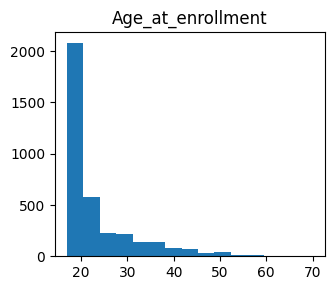

In [42]:
# Visualization for Numerical Features

numerical_cols = data.select_dtypes(include=['number']).columns
num_cols = len(numerical_cols)
num_rows = (num_cols + 3) // 4 # Adjust rows based on the number of columns

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(12, 3 * num_rows)) 
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(numerical_cols):
    axes[i].hist(data[col], bins=15)
    axes[i].set_title(col)
    axes[i].grid(False) # Add titles to each subplot

# Remove any unused subplots if the number of numerical columns isn't a multiple of 4
if num_cols < len(axes):
    for j in range(num_cols, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\Dini\AppData\Local\Temp\ipykernel_9712\3183282538.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), ha='right') # Align the rotated labels to the right
C:\Users\Dini\AppData\Local\Temp\ipykernel_9712\3183282538.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), ha='right') # Align the rotated labels to the right
C:\Users\Dini\AppData\Local\Temp\ipykernel_9712\3183282538.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), ha='right') # Align the rotated labels to the right
C:\Users\Dini\AppData\Local\Temp\ipykernel_9712\3183282538.py:12: UserWarning: set_ticklabels() should 

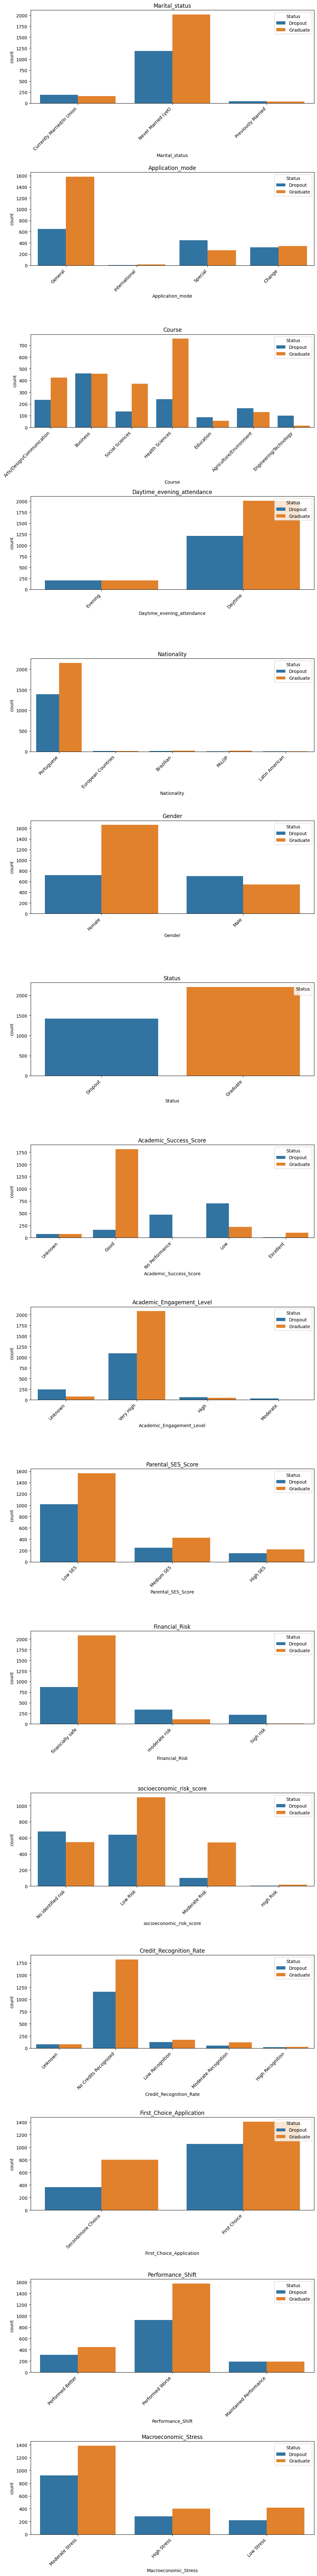

In [43]:
#Visualization for Categorical Features

categorical_cols = data.select_dtypes(include=['object', 'category']).columns

num_categorical = len(categorical_cols)
fig, axes = plt.subplots(num_categorical, 1, figsize=(10, 5 * num_categorical))

for i, feature in enumerate(categorical_cols):
    sns.countplot(data=data, x=feature, hue='Status', ax=axes[i])
    axes[i].set_title(feature)
    axes[i].tick_params(axis='x', rotation=45) # Rotate the labels
    axes[i].set_xticklabels(axes[i].get_xticklabels(), ha='right') # Align the rotated labels to the right
    axes[i].legend(title='Status', loc='upper right')

plt.tight_layout()
plt.show()

## Data Preparation / Preprocessing

### Check the Missing Values

In [108]:
missing_values_count = data.isna().sum()

# Filter the Series to show only columns with missing values (where the count is greater than 0)
columns_with_missing = missing_values_count[missing_values_count > 0]

print(columns_with_missing)

Series([], dtype: int64)


### Check the Duplicates

In [109]:
data.duplicated().sum()

np.int64(612)

### Copying Data for Analysis and Dasboard

In [110]:
# Data for Analysis
data_ml = data.copy()

# Data for dashboard
data_dashboard = data.copy()

### Preparing data for analysis (encoding, scaling, spliting)

In [119]:
# Define features and target
X = data_ml.drop('Status', axis=1)
y = data_ml['Status']

In [120]:
# Encode the target (y) separately
y = y.map({'Graduate': 0, 'Dropout': 1})

In [121]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
# Inisiasi OneHot Encoder & StandardScaler
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()

In [123]:
# Encode categorical features in X
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
ohe.fit(X_train[categorical_cols])

X_train_encoded = ohe.transform(X_train[categorical_cols])

#  Scale numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float']).columns
scaler.fit(X_train[numerical_cols])

X_train_scaled = scaler.transform(X_train[numerical_cols])

In [124]:
X_train_processed = pd.concat([
    pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train.index),
    pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names_out(categorical_cols), index=X_train.index)
], axis=1)

In [125]:
# Scaling and Encoding for the test data

X_test_encoded = ohe.transform(X_test[categorical_cols]) 
X_test_scaled = scaler.transform(X_test[numerical_cols]) 

X_test_processed = pd.concat([
    pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test.index),
    pd.DataFrame(X_test_encoded, columns=ohe.get_feature_names_out(categorical_cols), index=X_test.index)
], axis=1)

In [126]:
# Save the scaler and encoder
joblib.dump(ohe, 'onehot_encoder.joblib')
joblib.dump(scaler, 'standard_scaler.joblib')

['standard_scaler.joblib']

## Modeling & Evaluation

### Random Forest

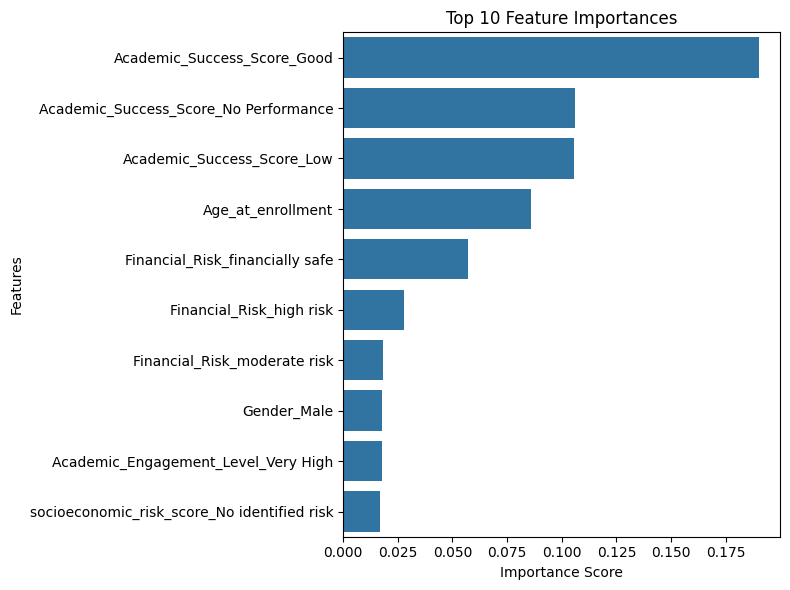

In [127]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_processed, y_train)

feature_importances = pd.Series(rf_model.feature_importances_, index=X_train_processed.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
sns.barplot(x=top_features, y=top_features.index)
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

This plot shows the top 10 features ranked by how much they contribute to the model’s decisions.

In [129]:
# Evaluation

rf_predictions = rf_model.predict(X_test_processed)
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_predictions))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       449
           1       0.85      0.84      0.85       277

    accuracy                           0.88       726
   macro avg       0.88      0.87      0.88       726
weighted avg       0.88      0.88      0.88       726



### Logistic Regression

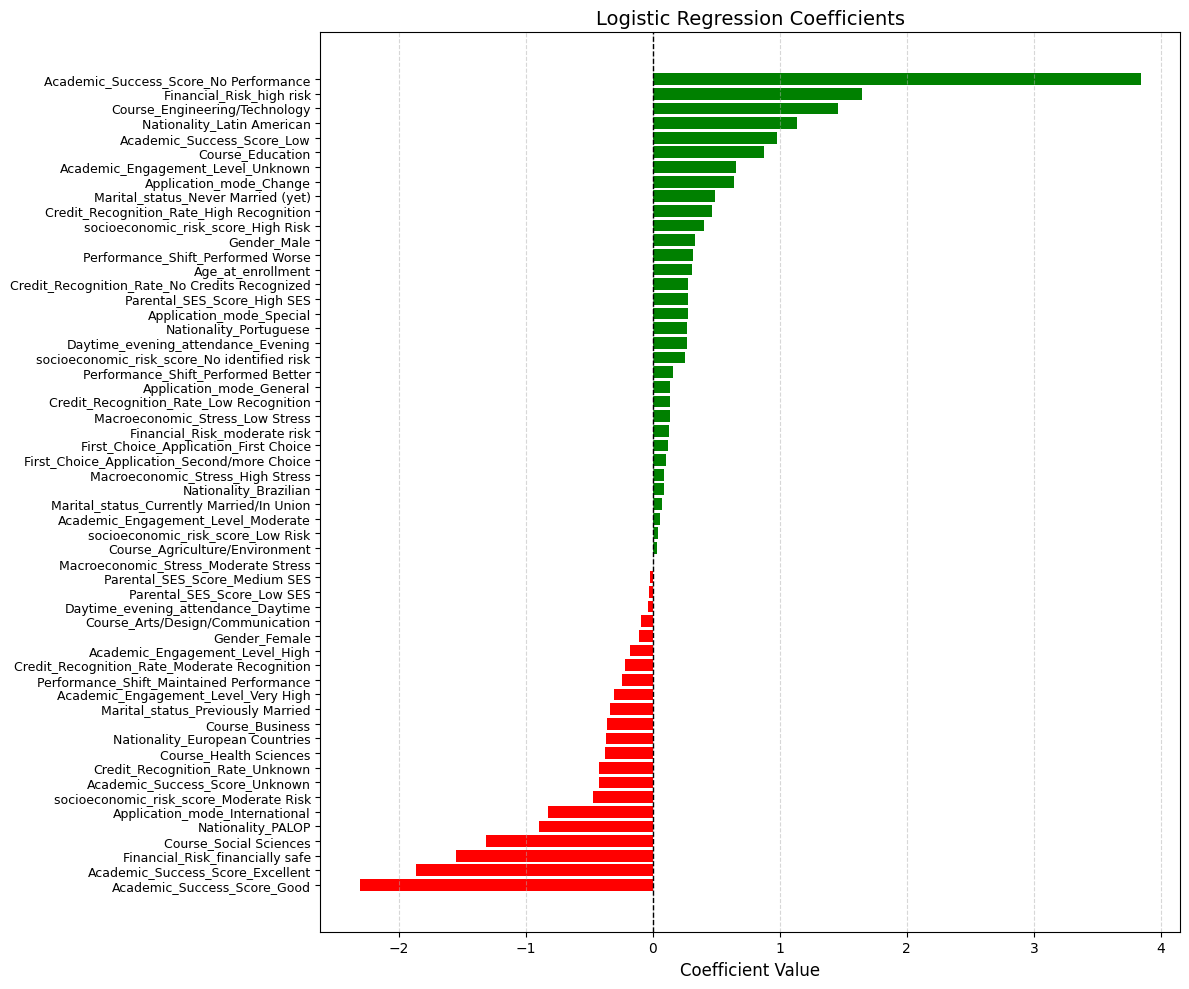

In [130]:
lr_model = LogisticRegression(random_state=42, solver='liblinear')
lr_model.fit(X_train_processed, y_train)

# Create a DataFrame of coefficients
coef = lr_model.coef_[0]
features = X_train_processed.columns
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coef})

# Sort by coefficient value
coef_df = coef_df.sort_values(by='Coefficient')

# Plot
plt.figure(figsize=(12, 10))
bars = plt.barh(coef_df['Feature'], coef_df['Coefficient'], 
                color=np.where(coef_df['Coefficient'] > 0, 'green', 'red'))

# Layout
plt.xlabel('Coefficient Value', fontsize=12)
plt.title('Logistic Regression Coefficients', fontsize=14)
plt.xticks(fontsize=10)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.show()

This plot visualizes the coefficients from trained LogisticRegression model.

- **Positive coefficients** (green bars)
These increase the probability of the positive class (e.g., predicting dropout = 1, meaning a student is more likely to be dropped out).

- **Negative coefficients** (red bars)
These decrease the probability of the positive class (i.e., more likely to graduate).

The longer the bar (in either direction), the greater the impact that feature has on the prediction.

In [131]:
# Evaluation

lr_predictions = lr_model.predict(X_test_processed)
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       449
           1       0.86      0.86      0.86       277

    accuracy                           0.89       726
   macro avg       0.89      0.89      0.89       726
weighted avg       0.89      0.89      0.89       726



### Save the Models

In [132]:
joblib.dump(rf_model, 'random_forest_model.pkl')
joblib.dump(lr_model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

## Connect to MySQL

In [ ]:
# Database credentials and connection - MySQL
username = 'username' 
password = 'password'  
host = 'host'  
port = 'port'  
database = 'student'  

# SQLAlchemy engine for MySQL
DATABASE_URL = f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}'

engine = create_engine(DATABASE_URL)

# Store DataFrame to MySQL
table_name = 'student'  # Choose a table name
data_dashboard.to_sql(table_name, engine, if_exists='replace', index=False)

3630

In [ ]:
data_ml

,Marital_status,Application_mode,Course,Daytime_evening_attendance,Nationality,Gender,Age_at_enrollment,Status,Academic_Success_Score,Academic_Engagement_Level,Parental_SES_Score,Financial_Risk,socioeconomic_risk_score,Credit_Recognition_Rate,First_Choice_Application,Performance_Shift,Macroeconomic_Stress
count,3630,3630,3630,3630,3630,3630,3630.000000,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630
unique,3,4,7,2,5,2,NaN,2,5,4,3,3,4,5,2,3,3
top,Never Married (yet),General,Health Sciences,Daytime,Portuguese,Female,NaN,Graduate,Good,Very High,Low SES,financially safe,Low Risk,No Credits Recognized,First Choice,Performed Worse,Moderate Stress
freq,3199,2229,997,3222,3544,2381,NaN,2209,1975,3173,2579,2957,1743,2978,2461,2497,2308
mean,NaN,NaN,NaN,NaN,NaN,NaN,23.461157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,7.827994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
data_dashboard

,Marital_status,Application_mode,Course,Daytime_evening_attendance,Nationality,Gender,Age_at_enrollment,Status,Academic_Success_Score,Academic_Engagement_Level,Financial_Risk,socioeconomic_risk_score,Credit_Recognition_Rate,First_Choice_Application,Performance_Shift,Macroeconomic_Stress
0,Never Married (yet),General,Arts/Design/Communication,Daytime,Portuguese,Male,20,Dropout,Unknown,Unknown,financially safe,Low Risk,Unknown,Second/more Choice,Performed Better,Moderate Stress
1,Never Married (yet),International,Business,Daytime,Portuguese,Male,19,Graduate,Good,Very High,moderate risk,Low Risk,No Credits Recognized,First Choice,Performed Worse,Moderate Stress
2,Never Married (yet),General,Arts/Design/Communication,Daytime,Portuguese,Male,19,Dropout,No Performance,Unknown,moderate risk,Low Risk,No Credits Recognized,Second/more Choice,Performed Better,Moderate Stress
3,Never Married (yet),General,Arts/Design/Communication,Daytime,Portuguese,Female,20,Graduate,Good,Very High,financially safe,Low Risk,No Credits Recognized,Second/more Choice,Performed Worse,Moderate Stress
4,Currently Married/In Union,Special,Social Sciences,Evening,Portuguese,Female,45,Graduate,Good,Very High,financially safe,No identified risk,No Credits Recognized,First Choice,Performed Better,Moderate Stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Never Married (yet),General,Arts/Design/Communication,Daytime,Portuguese,Male,19,Graduate,Good,Very High,financially safe,No identified risk,No Credits Recognized,Second/more Choice,Performed Worse,High Stress
4420,Never Married (yet),General,Arts/Design/Communication,Daytime,European Countries,Female,18,Dropout,Low,Very High,high risk,Moderate Risk,No Credits Recognized,Second/more Choice,Performed Worse,Low Stress
4421,Never Married (yet),General,Health Sciences,Daytime,Portuguese,Female,30,Dropout,Low,Very High,financially safe,Moderate Risk,No Credits Recognized,First Choice,Performed Worse,Moderate Stress
4422,Never Married (yet),General,Business,Daytime,Portuguese,Female,20,Graduate,Good,Very High,financially safe,Moderate Risk,No Credits Recognized,First Choice,Performed Worse,Moderate Stress
